In [53]:
url="https://www.dropbox.com/home?preview=capture1log.pcap"

In [54]:
!curl -o /home/rufina/Documents/github-dropbox/rename/capture1log.pcap $url

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   340    0   340    0     0    542      0 --:--:-- --:--:-- --:--:--   542


In [55]:
ls -l /home/rufina/Documents/github-dropbox/rename/capture1log.pcap

-rw-r--r-- 1 rufina rufina 340 Mar 23 10:59 /home/rufina/Documents/github-dropbox/rename/capture1log.pcap


In [56]:
!md5sum /home/rufina/Documents/github-dropbox/rename/capture1log.pcap

11a0e64e51c0f532ebaf91efdee6ed6a  /home/rufina/Documents/github-dropbox/rename/capture1log.pcap


In [57]:
!tshark -v

TShark 1.10.6 (v1.10.6 from master-1.10)

Copyright 1998-2014 Gerald Combs <gerald@wireshark.org> and contributors.
This is free software; see the source for copying conditions. There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

Compiled (64-bit) with GLib 2.39.91, with libpcap, with libz 1.2.8, with POSIX
capabilities (Linux), without libnl, with SMI 0.4.8, with c-ares 1.10.0, with
Lua 5.2, without Python, with GnuTLS 2.12.23, with Gcrypt 1.5.3, with MIT
Kerberos, with GeoIP.

Running on Linux 3.13.0-46-generic, with locale en_US.UTF-8, with libpcap
version 1.5.3, with libz 1.2.8.
Intel(R) Xeon(R) CPU E5-1607 v3 @ 3.10GHz

Built using gcc 4.8.2.


In [58]:
!tshark -n -r /home/rufina/Documents/github-dropbox/rename/capture.log -T fields -Eheader=y -e frame.number -e frame.len > frame.len

In [59]:
!head -10 frame.len

frame.number	frame.len
1	74
2	74
3	66
4	385
5	66
6	638
7	66
8	1514
9	66


In [9]:
import pandas as pd

In [10]:
df=pd.read_table("frame.len")

In [11]:
df

,frame.number,frame.len
0,1,74
1,2,74
2,3,66
3,4,385
4,5,66
5,6,638
6,7,66
7,8,1514
8,9,66
9,10,490


In [29]:
df["frame.len"].describe()

count     110.000000
mean      194.963636
std       341.053116
min        60.000000
25%        66.000000
50%        66.000000
75%        74.000000
max      2247.000000
Name: frame.len, dtype: float64

In [30]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [31]:
figsize(10,6)

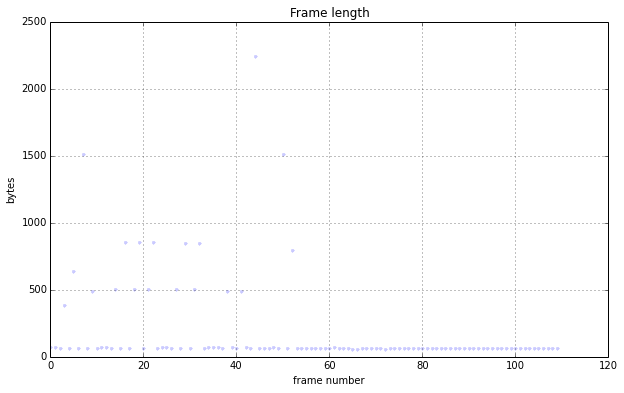

In [32]:
df["frame.len"].plot(style=".", alpha=0.2)
title("Frame length")
ylabel("bytes")
xlabel("frame number")

In [33]:
import subprocess
import datetime
import pandas as pd

def read_pcap(filename, fields=[], display_filter="", 
              timeseries=False, strict=False):
    if timeseries:
        fields = ["frame.time_epoch"] + fields
    fieldspec = " ".join("-e %s" % f for f in fields)

    display_filters = fields if strict else []
    if display_filter:
        display_filters.append(display_filter)
    filterspec = "-R '%s'" % " and ".join(f for f in display_filters)

    options = "-r %s -n -T fields -Eheader=y" % filename
    cmd = "tshark %s %s %s" % (options, filterspec, fieldspec)
    proc = subprocess.Popen(cmd, shell = True, 
                                 stdout=subprocess.PIPE)
    if timeseries:
        df = pd.read_table(proc.stdout, 
                        index_col = "frame.time_epoch", 
                        parse_dates=True, 
                        date_parser=datetime.datetime.fromtimestamp)
    else:
        df = pd.read_table(proc.stdout)
    return df

In [35]:
framelen=read_pcap("/home/rufina/Documents/github-dropbox/rename/capture.log", ["frame.len"], timeseries=True)
framelen

,frame.len
frame.time_epoch,
2015-03-22 01:36:56.277953,74
2015-03-22 01:36:56.352461,74
2015-03-22 01:36:56.352498,66
2015-03-22 01:36:56.352600,385
2015-03-22 01:36:56.426809,66
2015-03-22 01:36:56.432716,638
2015-03-22 01:36:56.432750,66
2015-03-22 01:36:56.432809,1514
2015-03-22 01:36:56.432826,66


In [36]:
bytes_per_second=framelen.resample("S", how="sum")

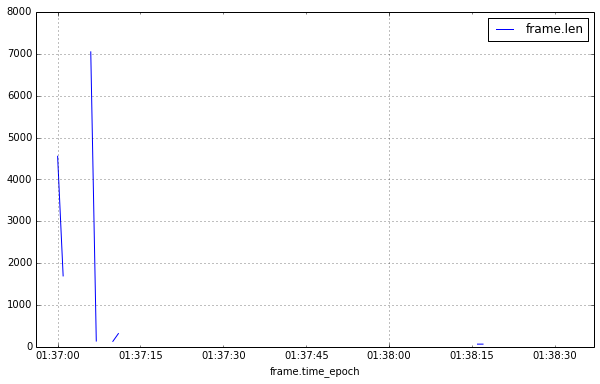

In [37]:
bytes_per_second.plot()

In [38]:
fields=["tcp.stream", "ip.src", "ip.dst", "tcp.seq", "tcp.ack", "tcp.window_size", "tcp.len"]
ts=read_pcap("/home/rufina/Documents/github-dropbox/rename/capture.log", fields, timeseries=True, strict=True)
ts

,tcp.stream,ip.src,ip.dst,tcp.seq,tcp.ack,tcp.window_size,tcp.len
frame.time_epoch,,,,,,,
2015-03-22 01:36:56.352461,0,91.189.90.41,128.119.247.197,0,1,5792,0
2015-03-22 01:36:56.352498,0,128.119.247.197,91.189.90.41,1,1,29312,0
2015-03-22 01:36:56.352600,0,128.119.247.197,91.189.90.41,1,1,29312,319
2015-03-22 01:36:56.426809,0,91.189.90.41,128.119.247.197,1,320,6912,0
2015-03-22 01:36:56.432716,0,91.189.90.41,128.119.247.197,1,320,6912,572
2015-03-22 01:36:56.432750,0,128.119.247.197,91.189.90.41,320,573,30464,0
2015-03-22 01:36:56.432809,0,91.189.90.41,128.119.247.197,573,320,6912,1448
2015-03-22 01:36:56.432826,0,128.119.247.197,91.189.90.41,320,2021,33280,0
2015-03-22 01:36:56.432874,0,91.189.90.41,128.119.247.197,2021,320,6912,424


In [39]:
stream=ts[ts["tcp.stream"] == 10]

In [40]:
stream

"<class 'pandas.tseries.index.DatetimeIndex'> Length: 0, Freq: None, Timezone: None",Empty DataFrame


In [41]:
per_stream=ts.groupby("tcp.stream")
per_stream.head()

tcp.stream           ip.src  \
tcp.stream frame.time_epoch                                          
0          2015-03-22 01:36:56.352461           0     91.189.90.41   
           2015-03-22 01:36:56.352498           0  128.119.247.197   
           2015-03-22 01:36:56.352600           0  128.119.247.197   
           2015-03-22 01:36:56.426809           0     91.189.90.41   
           2015-03-22 01:36:56.432716           0     91.189.90.41   
1          2015-03-22 01:37:00.384426           1      72.21.91.29   
           2015-03-22 01:37:00.384468           1  128.119.247.197   
           2015-03-22 01:37:00.384598           1  128.119.247.197   
           2015-03-22 01:37:00.392238           1      72.21.91.29   
           2015-03-22 01:37:00.392916           1      72.21.91.29   
2          2015-03-22 01:37:01.551336           2   216.58.219.206   
           2015-03-22 01:37:01.551378           2  128.119.247.197   
           2015-03-22 01:37:01.551529           2  128.119.247.197   
           2015-03-22 01:37:01.558811           2   216.58.219.206   
           2015-03-22 01:37:01.580403           2   216.58.219.206   
4          2015-03-22 01:37:06.035676           4   72.167.239.239   
           2015-03-22 01:37:06.035720           4  128.119.247.197   
           2015-03-22 01:37:06.035838           4  128.119.247.197   
3          2015-03-22 01:37:06.036116           3   72.167.239.239   
           2015-03-22 01:37:06.036143           3  128.119.247.197   
           2015-03-22 01:37:06.036280           3  128.119.247.197   
4          2015-03-22 01:37:06.061699           4   72.167.239.239   
           2015-03-22 01:37:06.062557           4   72.167.239.239   
3          2015-03-22 01:37:06.062731           3   72.167.239.239   
5          2015-03-22 01:37:06.063453           5   72.167.239.239   
           2015-03-22 01:37:06.063485           5  128.119.247.197   
3          2015-03-22 01:37:06.063605           3   72.167.239.239   
5          2015-03-22 01:37:07.152653           5   72.167.239.239   
           2015-03-22 01:37:07.152698           5  128.119.247.197   
           2015-03-22 01:37:11.450986           5  128.119.247.197   

                                                ip.dst  tcp.seq  tcp.ack  \
tcp.stream frame.time_epoch                                                
0          2015-03-22 01:36:56.352461  128.119.247.197        0        1   
           2015-03-22 01:36:56.352498     91.189.90.41        1        1   
           2015-03-22 01:36:56.352600     91.189.90.41        1        1   
           2015-03-22 01:36:56.426809  128.119.247.197        1      320   
           2015-03-22 01:36:56.432716  128.119.247.197        1      320   
1          2015-03-22 01:37:00.384426  128.119.247.197        0        1   
           2015-03-22 01:37:00.384468      72.21.91.29        1        1   
           2015-03-22 01:37:00.384598      72.21.91.29        1        1   
           2015-03-22 01:37:00.392238  128.119.247.197        1      440   
           2015-03-22 01:37:00.392916  128.119.247.197        1      440   
2          2015-03-22 01:37:01.551336  128.119.247.197        0        1   
           2015-03-22 01:37:01.551378   216.58.219.206        1        1   
           2015-03-22 01:37:01.551529   216.58.219.206        1        1   
           2015-03-22 01:37:01.558811  128.119.247.197        1      438   
           2015-03-22 01:37:01.580403  128.119.247.197        1      438   
4          2015-03-22 01:37:06.035676  128.119.247.197        0        1   
           2015-03-22 01:37:06.035720   72.167.239.239        1        1   
           2015-03-22 01:37:06.035838   72.167.239.239        1        1   
3          2015-03-22 01:37:06.036116  128.119.247.197        0        1   
           2015-03-22 01:37:06.036143   72.167.239.239        1        1   
           2015-03-22 01:37:06.036280   72.167.239.239        1        1   
4          2015-03-22 01:37:06.061699  128.119.247

In [42]:
bytes_per_stream = per_stream["tcp.len"].sum()
bytes_per_stream.head()

tcp.stream
0             2763
1             3681
2             2436
3             2610
4             2610
Name: tcp.len, dtype: int64

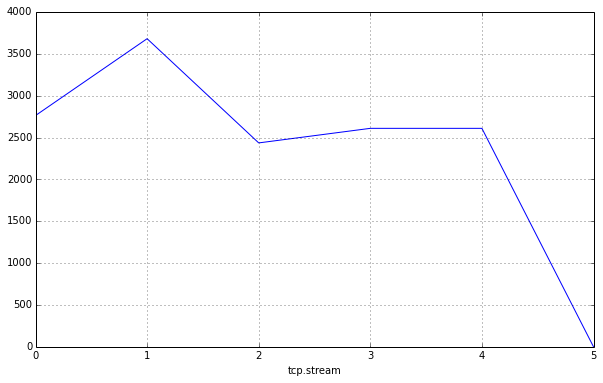

In [43]:
bytes_per_stream.plot()

In [44]:
bytes_per_stream.max()

3681

In [62]:
biggest_stream=bytes_per_stream.idxmax()
biggest_stream

1

In [63]:
bytes_per_stream.ix[biggest_stream]

3681

In [76]:
!tshark -r /home/rufina/Documents/github-dropbox/rename/capture.log -q -z conv,eth -z conv,ip -z conv,tcp

TCP Conversations
Filter:<No Filter>
                                               |       <-      | |       ->      | |     Total     |    Relative    |   Duration   |
                                               | Frames  Bytes | | Frames  Bytes | | Frames  Bytes |      Start     |              |
128.119.247.197:43322 <-> 91.189.90.41:http         15      3442      16      1383      31      4825     0.000000000       100.9560
128.119.247.197:38350 <-> 216.58.219.206:http       13      2428      15      1872      28      4300     5.266054000        91.8791
128.119.247.197:33076 <-> 72.21.91.29:http           8      2900      10      1985      18      4885     4.098756000        16.4148
128.119.247.197:60031 <-> 72.167.239.239:http        7      2645       6       833      13      3478     9.731813000         5.0227
128.119.247.197:60032 <-> 72.167.239.239:http        6      2579       5       767      11      3346     9.731851000         5.0223
128.119.247.197:60033 <-> 72.167.239.

[11  0  0  0 13  7  1  2  0 25  4  0  0  0  4  3  0  2  0  1  5  0  0  0  0
  0  0  2  0  0  2  0  0  0  0  0  0  2  0  0  2  0  0  0  0  0  0  2  0  0
  2  0  0  0  0  0  0  2  0  0]
[ 2.54909091         nan         nan         nan  2.80307692  1.93828571
  4.024       3.652              nan  2.21376     0.544              nan
         nan         nan  0.504       0.528              nan  0.528
         nan  0.48        0.528              nan         nan         nan
         nan         nan         nan  0.528              nan         nan
  0.528              nan         nan         nan         nan         nan
         nan  0.528              nan         nan  0.528              nan
         nan         nan         nan         nan         nan  0.528
         nan         nan  0.528              nan         nan         nan
         nan         nan         nan  0.528              nan         nan]


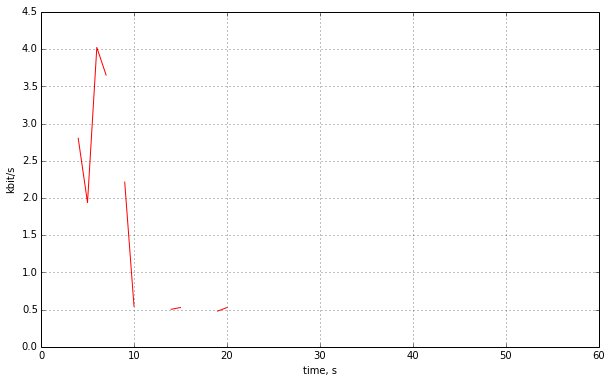

In [69]:
import matplotlib.pyplot as plt  
import numpy as np  
x, y = np.loadtxt('/home/rufina/Desktop/data.txt', unpack=True)  
bins = np.arange(60+1)  
totals, edges = np.histogram(x, weights=y, bins=bins)  
counts, edges = np.histogram(x, bins=bins)  

print counts  
print totals*0.008/counts  

plt.plot(totals*0.008/counts, 'r')  
plt.xlabel('time, s')  
plt.ylabel('kbit/s')  
plt.grid(True)  
plt.xlim(0.0, 60.0)  
plt.show()  

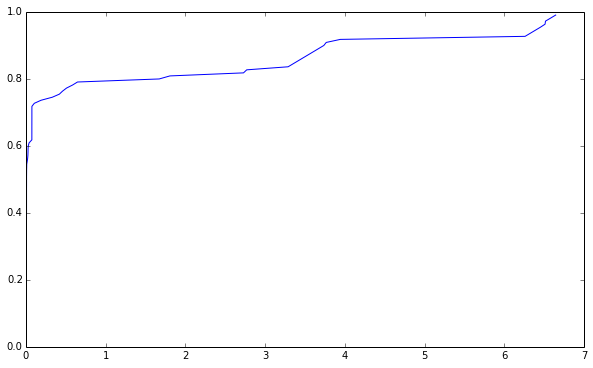

In [81]:
import numpy as np

import matplotlib.pyplot as plt

data = np.loadtxt('/home/rufina/Desktop/123456.csv')

sorted_data = np.sort(data)

yvals=np.arange(len(sorted_data))/float(len(sorted_data))

plt.plot(sorted_data,yvals)

plt.show()


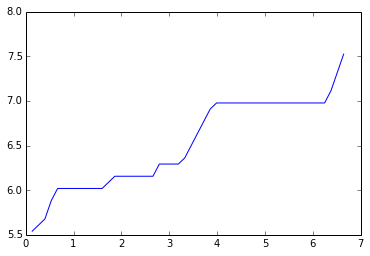

In [103]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('/home/rufina/Desktop/123456.csv')

# Choose how many bins you want here
num_bins = 50

# Use the histogram function to bin the data
counts, bin_edges = np.histogram(data, bins=num_bins, normed=True)

# Now find the cdf
cdf = np.cumsum(counts)

# And finally plot the cdf
plt.plot(bin_edges[1:], cdf)

plt.show()

Populating the interactive namespace from numpy and matplotlib
With a threshold of 2.00, you get 7.0% of the data
To get 97.5% of the data, you need a threshold of 8.92.


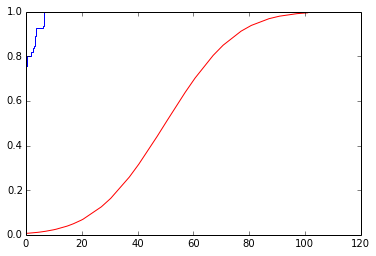

In [95]:
%pylab inline
import scipy.stats as stats

myMean = 50
mySD = 20
numData = 100
data = np.loadtxt('/home/rufina/Desktop/123456.csv')
# Calculate the cumulative distribution function, CDF
numbins = 20
counts, bin_edges = histogram(data, bins=numbins, normed=True)
cdf = cumsum(counts)
cdf /= max(cdf)

# compare with the exact CDF
step(bin_edges[1:],cdf)
hold(True)
plot(x, stats.norm.cdf(x, myMean, mySD),'r')

# Find out the value corresponding to the x-th percentile: the
# "cumulative distribution function"
value = 2
myMean = 5
mySD = 2
cdf = stats.norm.cdf(value, myMean, mySD)
print(('With a threshold of {0:4.2f}, you get {1}% of the data'.format(value, round(cdf*100))))

# For the percentile corresponding to a certain value: 
# the "inverse cumulative distribution function" 
value = 0.025
icdf = stats.norm.isf(value, myMean, mySD)
print('To get {0}% of the data, you need a threshold of {1:4.2f}.'.format((1-value)*100, icdf))

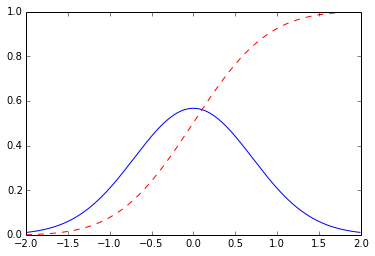

In [104]:
import numpy as np
from pylab import *

# Create some test data
dx = .01
X  = np.arange(-2,2,dx)
Y  = exp(-X**2)

# Normalize the data to a proper PDF
Y /= (dx*Y).sum()

# Compute the CDF
CY = np.cumsum(Y*dx)

# Plot both
plot(X,Y)
plot(X,CY,'r--')

show()